In [1]:
import logging as log
import os
import os.path as path
import pickle
import subprocess
import sys
import time
from multiprocessing import Pool
from pathlib import Path
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

In [2]:
df = pd.read_pickle(path.join('..', 'data', 'feat_matrix.pkl'))
with open(path.join('..', 'data', 'features_x.txt'), 'rb') as f:
    features = pickle.load(f)

In [3]:
df['StateHoliday'].unique()

array([0, 1, 2, 3])

In [4]:
df[df['Type'] == 'train']['SalesLog'].isna().sum()

0

In [5]:
df['Date'] = pd.to_datetime(df['DateInt'].apply(str))
df = df.set_index('Date')

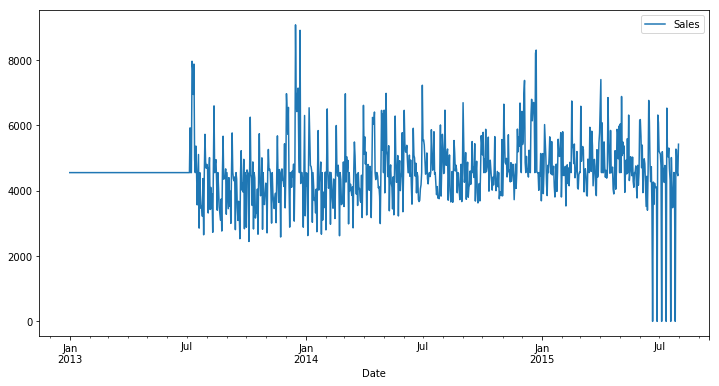

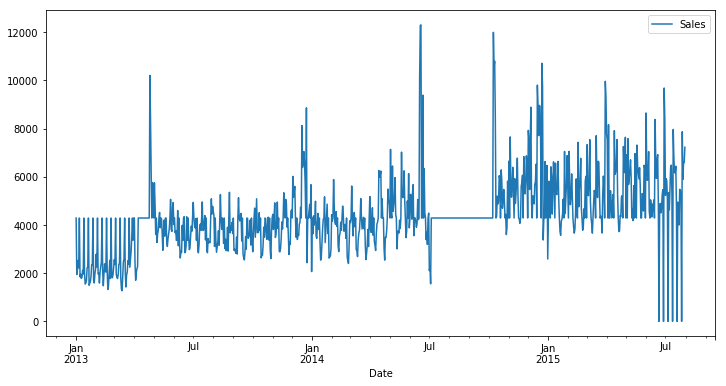

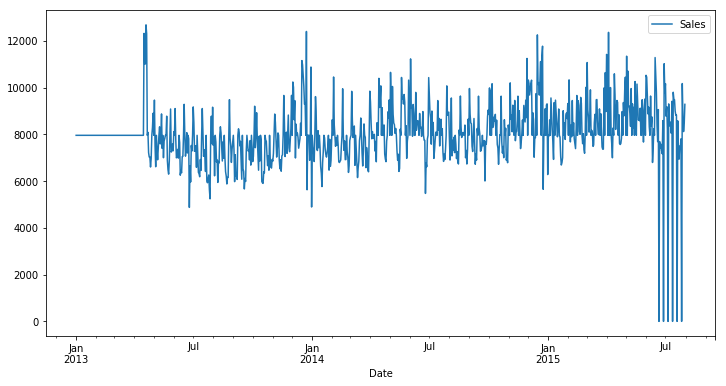

In [6]:
df_store = df[df['Store'] == 103]
df_store[['Sales']].plot(figsize=(12,6))
df_store = df[df['Store'] == 708]
df_store[['Sales']].plot(figsize=(12,6))
df_store = df[df['Store'] == 349]
df_store[['Sales']].plot(figsize=(12,6))
plt.show()

In [7]:
df_store[df_store['Sales'] == 0]

,AvgCustomersSchoolHoliday,Year,SchoolHoliday,DayOfMonth,LastDayCustomers,Month,AvgWeekSales,AvgCustomersPromo,HolidayNextWeek,Avg3MonthsSales,...,Week,SalesLog,Customers,AvgYearSales,Avg3MonthsCustomers,StoreType,Assortment,CompetitionDistance,CompetitionOpenSince,Promo2Weeks
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-26,793.0,2015,0,26,0.0,7,8239.0,841.5,5.0,8745.0,...,30,0.0,0.0,8181.0,861.0,2,2,7,2313,-1
2015-07-19,793.0,2015,0,19,0.0,7,8239.0,841.5,2.0,8745.0,...,29,0.0,0.0,8181.0,861.0,2,2,7,2313,-1
2015-07-12,793.0,2015,0,12,0.0,7,8239.0,841.5,0.0,8745.0,...,28,0.0,0.0,8181.0,861.0,2,2,7,2313,-1
2015-07-05,793.0,2015,0,5,0.0,7,8239.0,841.5,0.0,8745.0,...,27,0.0,0.0,8181.0,861.0,2,2,7,2313,-1
2015-06-28,793.0,2015,0,28,0.0,6,8239.0,841.5,0.0,8745.0,...,26,0.0,0.0,8181.0,861.0,2,2,7,2313,-1
2015-06-21,793.0,2015,0,21,0.0,6,8239.0,841.5,0.0,8745.0,...,25,0.0,0.0,8181.0,861.0,2,2,7,2313,-1


In [8]:
data = pd.read_csv('../data/train.csv', low_memory=False)
data[data['Sales'] == 0].shape

(172871, 9)

In [9]:
outliers_count = df[df['Outlier'] == True].shape[0]
val_sales_zero_count = df[(df['Type'] == 'validation') & (df['Sales'] == 0)].shape[0]

KeyError: 'Outlier'

In [ ]:
outliers_count + val_sales_zero_count

In [ ]:
data[(data['Open'] == 1) & (data['Sales'] == 0)].shape[0]

In [ ]:
data[data['Sales'] > 0]['Sales'].median()

In [ ]:
data['StateHoliday'].unique()